In [74]:
import pandas as pd
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
# pd.set_option('display.max_colwidth', -1)

In [75]:
# Extract out sheets into indiduals csv files for easier reference
description_df = pd.read_excel(".\\Task_Data_Scientist_Dataset.xlsx")
description_df.to_csv('.\\desc.csv')

soc_df = pd.read_excel(".\\Task_Data_Scientist_Dataset.xlsx", sheet_name= 1) 
soc_df.to_csv('.\\social.csv')

pro_df = pd.read_excel(".\\Task_Data_Scientist_Dataset.xlsx", sheet_name= 2) 
pro_df.to_csv('.\\pro.csv')

outflow = pd.read_excel(".\\Task_Data_Scientist_Dataset.xlsx", sheet_name= 3) 
outflow.to_csv('.\\outflow.csv')

sale_df = pd.read_excel(".\\Task_Data_Scientist_Dataset.xlsx", sheet_name= 4) 
sale_df.to_csv('.\\sales.csv')

In [76]:
# Merge sheets 2-4 for combined dataset without labels 
df = pd.read_excel('.\\Task_Data_Scientist_Dataset.xlsx', sheet_name=[1,2,3,4], index_col='Client')
combined = df[1].merge(df[2], how= 'outer', on = 'Client').merge(df[3], how= 'outer', on = 'Client')
# labels sheet
#.merge(df[4],how= 'outer', on = 'Client')

combined


,Sex,Age,Tenure,Count_CA,Count_SA,Count_MF,Count_OVD,Count_CC,Count_CL,ActBal_CA,ActBal_SA,ActBal_MF,ActBal_OVD,ActBal_CC,ActBal_CL,VolumeCred,VolumeCred_CA,TransactionsCred,TransactionsCred_CA,VolumeDeb,VolumeDeb_CA,VolumeDebCash_Card,VolumeDebCashless_Card,VolumeDeb_PaymentOrder,TransactionsDeb,TransactionsDeb_CA,TransactionsDebCash_Card,TransactionsDebCashless_Card,TransactionsDeb_PaymentOrder
Client,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
909,M,21,27,1,NaN,NaN,1.0,NaN,1.0,4.710714,NaN,NaN,0.0,NaN,4291.996429,789.129643,738.230000,4.0,3.0,450.678571,448.892857,178.571429,0.000000,166.571429,8.0,7.0,1.0,0.0,4.0
1217,M,38,165,1,NaN,NaN,NaN,NaN,NaN,6752.244643,NaN,NaN,NaN,NaN,NaN,0.002143,0.002143,1.0,1.0,714.285714,714.285714,0.000000,0.000000,714.285714,1.0,1.0,0.0,0.0,1.0
850,F,49,44,1,NaN,NaN,NaN,NaN,NaN,43.523214,NaN,NaN,NaN,NaN,NaN,1392.402857,1392.402857,3.0,3.0,1226.345357,1226.345357,0.000000,0.000000,121.928571,6.0,6.0,0.0,0.0,1.0
1473,M,54,34,1,1.0,NaN,NaN,1.0,1.0,29.024286,14447.801429,NaN,NaN,653.91,1132.590357,1787.127500,939.128929,14.0,5.0,3875.137857,3794.580714,357.142857,444.597500,2076.785714,48.0,38.0,1.0,26.0,11.0
1038,M,29,106,1,NaN,NaN,NaN,NaN,NaN,27.035714,NaN,NaN,NaN,NaN,NaN,0.006071,0.006071,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,M,31,91,1,NaN,NaN,1.0,NaN,NaN,348.402857,NaN,NaN,0.0,NaN,NaN,469.179643,469.179643,3.0,3.0,465.092857,465.092857,178.571429,11.414286,271.714286,12.0,12.0,1.0,1.0,9.0
384,M,23,160,1,NaN,NaN,NaN,NaN,NaN,2418.876786,NaN,NaN,NaN,NaN,NaN,87.500357,87.500357,2.0,2.0,88.443929,88.443929,50.000000,37.372500,1.071429,8.0,8.0,2.0,5.0,1.0
977,M,46,59,1,NaN,NaN,NaN,NaN,NaN,2639.308571,NaN,NaN,NaN,NaN,NaN,71.428571,71.428571,1.0,1.0,76.103571,76.103571,75.000000,1.067857,0.035714,4.0,4.0,2.0,1.0,1.0


In [77]:
# Clean up Nans in meaningful way first to create a consistant values in training and test



In [78]:
# Check nan counts first
combined.isnull().sum()

Sex                                3
Age                                0
Tenure                             0
Count_CA                           0
Count_SA                        1189
Count_MF                        1309
Count_OVD                       1196
Count_CC                        1445
Count_CL                        1480
ActBal_CA                          0
ActBal_SA                       1189
ActBal_MF                       1309
ActBal_OVD                      1196
ActBal_CC                       1445
ActBal_CL                       1480
VolumeCred                        28
VolumeCred_CA                     28
TransactionsCred                  28
TransactionsCred_CA               28
VolumeDeb                         28
VolumeDeb_CA                      28
VolumeDebCash_Card                28
VolumeDebCashless_Card            28
VolumeDeb_PaymentOrder            28
TransactionsDeb                   28
TransactionsDeb_CA                28
TransactionsDebCash_Card          28
T

In [79]:
combined['Sex'].value_counts()

M    856
F    756
Name: Sex, dtype: int64

In [80]:
sex_nones = [953, 843,1363]
for people in sex_nones:
    print(combined.loc[people])
    print()

Sex                                 NaN
Age                                  50
Tenure                               35
Count_CA                              1
Count_SA                              1
Count_MF                            NaN
Count_OVD                           NaN
Count_CC                            NaN
Count_CL                            NaN
ActBal_CA                        1507.7
ActBal_SA                       1508.55
ActBal_MF                           NaN
ActBal_OVD                          NaN
ActBal_CC                           NaN
ActBal_CL                           NaN
VolumeCred                       884.63
VolumeCred_CA                    884.63
TransactionsCred                      4
TransactionsCred_CA                   4
VolumeDeb                       1387.61
VolumeDeb_CA                    1387.61
VolumeDebCash_Card                    0
VolumeDebCashless_Card           126.35
VolumeDeb_PaymentOrder          754.125
TransactionsDeb                      18


In [81]:
# From my data preview extension I can see that clients 843 and 953 is two of the 3 values for sex with NAN. Having a Nans in the account_balances as well. It is questionable to leave these people out of the dataset because:
# 1. Without a gender value whatever value I sub in here will effectively make the feature information be poor as there will be so few example of the value. 
# 2. They also are missing 8 other values (which i will sub in as zero)

# Upon checking my training label values I see both these people are in the test data so I will have to work with this

#index 1363 is not in the training set so this person could potentially be dropped

In [82]:
# Sub gender NANs for string 'N'
combined['Sex'] = combined['Sex'].fillna('N')

In [83]:
# Verifying values added
combined['Sex'].value_counts()

M    856
F    756
N      3
Name: Sex, dtype: int64

In [84]:
# In a later notebook I converted this column to an int 
# I'm moving it hear to make this change exist in both labelled and unlabelled datasets
# and remove duplication

combined.loc[combined['Sex'] == 'M', 'Sex'] = 0 
combined.loc[combined['Sex'] == 'F', 'Sex'] = 1 
combined.loc[combined['Sex'] == 'N', 'Sex'] = 2
combined['Sex'].value_counts()

0    856
1    756
2      3
Name: Sex, dtype: int64

In [85]:
# 1. Count_CA	2. Count_SA	3. Count_MF	4. Count_OVD 5. Count_CC Count_CL are the first numeric values which need to be cleaned up because they include NANs. 

#### Given the description I feel 0 is an appropriate subsitution because these people likely don't have their corresponding values (i.e no current account).
# 
# However I'll make a note that given the train test split these figures are accounnt for most of the entire data and as a result should possbly be dropped entirely. Or inversely could be a key feature as to who to target

# Moving down the list ActBal_MF ActBal_OVD	ActBal_CC seem also fair to assign to zero for the same reason I expect these zeros may align to the labels in sheet[4]

In [86]:
colums_of_interest = [ 'Count_CA','Count_SA','Count_MF','Count_OVD','Count_CC','Count_CL', 'ActBal_MF',	'ActBal_OVD', 'ActBal_CC', 'ActBal_SA','ActBal_CL']
combined[colums_of_interest].head(10)

,Count_CA,Count_SA,Count_MF,Count_OVD,Count_CC,Count_CL,ActBal_MF,ActBal_OVD,ActBal_CC,ActBal_SA,ActBal_CL
Client,,,,,,,,,,,
909,1,NaN,NaN,1.0,NaN,1.0,NaN,0.0000,NaN,NaN,4291.996429
1217,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
850,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1473,1,1.0,NaN,NaN,1.0,1.0,NaN,NaN,653.910000,14447.801429,1132.590357
1038,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
225,1,NaN,NaN,1.0,NaN,NaN,NaN,618.3975,NaN,NaN,NaN
699,1,NaN,4.0,1.0,NaN,NaN,18491.444286,0.0000,NaN,NaN,NaN
827,1,NaN,NaN,1.0,1.0,NaN,NaN,0.0000,0.464286,NaN,NaN
1231,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
for column in colums_of_interest:
    print(combined[column].value_counts())
    print()

1    1515
2      77
3      19
4       4
Name: Count_CA, dtype: int64

1.0    369
2.0     45
3.0     11
5.0      1
Name: Count_SA, dtype: int64

1.0     102
2.0      53
3.0      42
4.0      31
6.0      14
5.0      14
7.0      10
11.0      6
8.0       5
9.0       4
10.0      4
18.0      2
26.0      2
12.0      2
45.0      1
17.0      1
35.0      1
19.0      1
13.0      1
14.0      1
64.0      1
20.0      1
15.0      1
25.0      1
27.0      1
28.0      1
32.0      1
22.0      1
79.0      1
Name: Count_MF, dtype: int64

1.0    419
Name: Count_OVD, dtype: int64

1.0    170
Name: Count_CC, dtype: int64

1.0    115
2.0     17
3.0      2
5.0      1
Name: Count_CL, dtype: int64

0.000000         111
308.882143         3
14285.714286       3
169.674643         2
23214.285714       2
                ... 
36624.948214       1
35627.709643       1
107.251786         1
178571.428571      1
1825.093571        1
Name: ActBal_MF, Length: 190, dtype: int64

0.000000      299
901.616071      1
104.011429

In [88]:
# Some serious outliers in savings accounts but this will be  handled in data EDA

In [89]:
combined[colums_of_interest] = combined[colums_of_interest].fillna(0)

In [90]:
for column in colums_of_interest:
    print(combined[column].value_counts())
    print()

1    1515
2      77
3      19
4       4
Name: Count_CA, dtype: int64

0.0    1189
1.0     369
2.0      45
3.0      11
5.0       1
Name: Count_SA, dtype: int64

0.0     1309
1.0      102
2.0       53
3.0       42
4.0       31
6.0       14
5.0       14
7.0       10
11.0       6
8.0        5
10.0       4
9.0        4
12.0       2
26.0       2
18.0       2
22.0       1
32.0       1
15.0       1
45.0       1
28.0       1
25.0       1
20.0       1
27.0       1
64.0       1
14.0       1
13.0       1
19.0       1
35.0       1
17.0       1
79.0       1
Name: Count_MF, dtype: int64

0.0    1196
1.0     419
Name: Count_OVD, dtype: int64

0.0    1445
1.0     170
Name: Count_CC, dtype: int64

0.0    1480
1.0     115
2.0      17
3.0       2
5.0       1
Name: Count_CL, dtype: int64

0.000000         1420
308.882143          3
14285.714286        3
169.674643          2
23214.285714        2
                 ... 
36624.948214        1
35627.709643        1
107.251786          1
178571.428571       1
1

In [91]:
# Verify all is as desired
combined.isnull().sum()

Sex                              0
Age                              0
Tenure                           0
Count_CA                         0
Count_SA                         0
Count_MF                         0
Count_OVD                        0
Count_CC                         0
Count_CL                         0
ActBal_CA                        0
ActBal_SA                        0
ActBal_MF                        0
ActBal_OVD                       0
ActBal_CC                        0
ActBal_CL                        0
VolumeCred                      28
VolumeCred_CA                   28
TransactionsCred                28
TransactionsCred_CA             28
VolumeDeb                       28
VolumeDeb_CA                    28
VolumeDebCash_Card              28
VolumeDebCashless_Card          28
VolumeDeb_PaymentOrder          28
TransactionsDeb                 28
TransactionsDeb_CA              28
TransactionsDebCash_Card        28
TransactionsDebCashless_Card    28
TransactionsDeb_Paym

In [92]:
# Cool everything as expected
combined

,Sex,Age,Tenure,Count_CA,Count_SA,Count_MF,Count_OVD,Count_CC,Count_CL,ActBal_CA,ActBal_SA,ActBal_MF,ActBal_OVD,ActBal_CC,ActBal_CL,VolumeCred,VolumeCred_CA,TransactionsCred,TransactionsCred_CA,VolumeDeb,VolumeDeb_CA,VolumeDebCash_Card,VolumeDebCashless_Card,VolumeDeb_PaymentOrder,TransactionsDeb,TransactionsDeb_CA,TransactionsDebCash_Card,TransactionsDebCashless_Card,TransactionsDeb_PaymentOrder
Client,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
909,0,21,27,1,0.0,0.0,1.0,0.0,1.0,4.710714,0.000000,0.000000,0.0,0.00,4291.996429,789.129643,738.230000,4.0,3.0,450.678571,448.892857,178.571429,0.000000,166.571429,8.0,7.0,1.0,0.0,4.0
1217,0,38,165,1,0.0,0.0,0.0,0.0,0.0,6752.244643,0.000000,0.000000,0.0,0.00,0.000000,0.002143,0.002143,1.0,1.0,714.285714,714.285714,0.000000,0.000000,714.285714,1.0,1.0,0.0,0.0,1.0
850,1,49,44,1,0.0,0.0,0.0,0.0,0.0,43.523214,0.000000,0.000000,0.0,0.00,0.000000,1392.402857,1392.402857,3.0,3.0,1226.345357,1226.345357,0.000000,0.000000,121.928571,6.0,6.0,0.0,0.0,1.0
1473,0,54,34,1,1.0,0.0,0.0,1.0,1.0,29.024286,14447.801429,0.000000,0.0,653.91,1132.590357,1787.127500,939.128929,14.0,5.0,3875.137857,3794.580714,357.142857,444.597500,2076.785714,48.0,38.0,1.0,26.0,11.0
1038,0,29,106,1,0.0,0.0,0.0,0.0,0.0,27.035714,0.000000,0.000000,0.0,0.00,0.000000,0.006071,0.006071,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,0,31,91,1,0.0,0.0,1.0,0.0,0.0,348.402857,0.000000,0.000000,0.0,0.00,0.000000,469.179643,469.179643,3.0,3.0,465.092857,465.092857,178.571429,11.414286,271.714286,12.0,12.0,1.0,1.0,9.0
384,0,23,160,1,0.0,0.0,0.0,0.0,0.0,2418.876786,0.000000,0.000000,0.0,0.00,0.000000,87.500357,87.500357,2.0,2.0,88.443929,88.443929,50.000000,37.372500,1.071429,8.0,8.0,2.0,5.0,1.0
977,0,46,59,1,0.0,0.0,0.0,0.0,0.0,2639.308571,0.000000,0.000000,0.0,0.00,0.000000,71.428571,71.428571,1.0,1.0,76.103571,76.103571,75.000000,1.067857,0.035714,4.0,4.0,2.0,1.0,1.0


In [93]:
# Hmmm when I check the number of None values in my data preview extension I can see that there is more than 28 values of many of the columns 
# VolumeCred                      28
# VolumeCred_CA                   28
# TransactionsCred                28
# TransactionsCred_CA             28
# VolumeDeb                       28
# VolumeDeb_CA                    28
# VolumeDebCash_Card              28
# VolumeDebCashless_Card          28
# VolumeDeb_PaymentOrder          28
# TransactionsDeb                 28
# TransactionsDeb_CA              28
# TransactionsDebCash_Card        28
# TransactionsDebCashless_Card    28
# TransactionsDeb_PaymentOrder    28
# Its hard to say what to do here without some domain knowledge but given that 0.00 seems to be an accepted value or 0 in case where it the column value is integers versus floats im going to set these to zeros.

# It's also likely that I will create a boolean feature later to capture if a client has x_product or not, but for now this will do

# Worse case I could simply remove these values from my model later on


In [94]:
combined.columns

Index(['Sex', 'Age', 'Tenure', 'Count_CA', 'Count_SA', 'Count_MF', 'Count_OVD',
       'Count_CC', 'Count_CL', 'ActBal_CA', 'ActBal_SA', 'ActBal_MF',
       'ActBal_OVD', 'ActBal_CC', 'ActBal_CL', 'VolumeCred', 'VolumeCred_CA',
       'TransactionsCred', 'TransactionsCred_CA', 'VolumeDeb', 'VolumeDeb_CA',
       'VolumeDebCash_Card', 'VolumeDebCashless_Card',
       'VolumeDeb_PaymentOrder', 'TransactionsDeb', 'TransactionsDeb_CA',
       'TransactionsDebCash_Card', 'TransactionsDebCashless_Card',
       'TransactionsDeb_PaymentOrder'],
      dtype='object')

In [95]:
remaining_nan_rows = combined[combined.isna().any(axis=1)]
remaining_nan_rows

,Sex,Age,Tenure,Count_CA,Count_SA,Count_MF,Count_OVD,Count_CC,Count_CL,ActBal_CA,ActBal_SA,ActBal_MF,ActBal_OVD,ActBal_CC,ActBal_CL,VolumeCred,VolumeCred_CA,TransactionsCred,TransactionsCred_CA,VolumeDeb,VolumeDeb_CA,VolumeDebCash_Card,VolumeDebCashless_Card,VolumeDeb_PaymentOrder,TransactionsDeb,TransactionsDeb_CA,TransactionsDebCash_Card,TransactionsDebCashless_Card,TransactionsDeb_PaymentOrder
Client,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
84,0,66,235,2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1528,1,23,110,1,0.0,0.0,0.0,0.0,0.0,1032.995000,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1139,0,52,71,1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
355,0,43,36,1,0.0,0.0,0.0,0.0,0.0,174.485000,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1446,1,46,106,1,0.0,0.0,0.0,0.0,0.0,323.645714,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1141,1,48,37,1,0.0,0.0,0.0,0.0,0.0,2262.178929,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1244,1,34,152,1,0.0,0.0,0.0,0.0,0.0,2392.714643,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
305,0,37,140,1,0.0,0.0,0.0,0.0,0.0,234.464643,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
741,0,67,77,1,0.0,0.0,0.0,0.0,0.0,58.583929,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
# There is probably a better way to do this but I just wanted a super quick answer to how many of the training set make up these 28 columns. The answer is 10 which means 18 are in the test set which if i split test to generate a validation set could mean 9  in those sets get removed
df[4].merge(remaining_nan_rows, how= 'right', on = 'Client')

,Sale_MF,Sale_CC,Sale_CL,Revenue_MF,Revenue_CC,Revenue_CL,Sex,Age,Tenure,Count_CA,Count_SA,Count_MF,Count_OVD,Count_CC,Count_CL,ActBal_CA,ActBal_SA,ActBal_MF,ActBal_OVD,ActBal_CC,ActBal_CL,VolumeCred,VolumeCred_CA,TransactionsCred,TransactionsCred_CA,VolumeDeb,VolumeDeb_CA,VolumeDebCash_Card,VolumeDebCashless_Card,VolumeDeb_PaymentOrder,TransactionsDeb,TransactionsDeb_CA,TransactionsDebCash_Card,TransactionsDebCashless_Card,TransactionsDeb_PaymentOrder
Client,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
377,0.0,0.0,0.0,0.0,0.000000,0.00,0,38,167,1,0.0,0.0,0.0,0.0,0.0,611.604643,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1269,0.0,0.0,0.0,0.0,0.000000,0.00,1,37,43,1,0.0,0.0,0.0,0.0,0.0,514.055000,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1203,0.0,0.0,0.0,0.0,0.000000,0.00,1,45,174,1,0.0,0.0,0.0,0.0,0.0,35.145357,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1199,0.0,1.0,0.0,0.0,5.892857,0.00,1,73,178,1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
663,0.0,0.0,0.0,0.0,0.000000,0.00,0,42,106,1,0.0,0.0,0.0,0.0,0.0,9.275000,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1141,0.0,1.0,0.0,0.0,4.035714,0.00,1,48,37,1,0.0,0.0,0.0,0.0,0.0,2262.178929,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
962,0.0,0.0,0.0,0.0,0.000000,0.00,1,56,151,1,0.0,0.0,0.0,0.0,0.0,1783.961429,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
334,0.0,1.0,0.0,0.0,1.786786,0.00,1,49,163,1,0.0,0.0,0.0,0.0,0.0,23516.171429,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
741,0.0,1.0,0.0,0.0,8.934286,0.00,0,67,77,1,0.0,0.0,0.0,0.0,0.0,58.583929,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
# After checking the nan values in my labels csv file i can see that 9 of them have reasonably high revenue labels so for this reason these nans must be subsitituted in

In [98]:
# Sanity check to see if labels are don't include any nans
df[4].isnull().sum()

Sale_MF       0
Sale_CC       0
Sale_CL       0
Revenue_MF    0
Revenue_CC    0
Revenue_CL    0
dtype: int64

In [99]:
# # So in theory I can drop all these values and just not train on them which kind of makes sense because   14 of the 29 columns are missing which means that a lot of these rows are pretty much missing half the potential information to impute a decision.
# This might come back to hit me hard because who knows these 28 could be key distinguiser otherwise if nan is really meant to be 0.

In [100]:
# % of data lost from training set
print(f'% lost from training set: {(10/969)*100}')
print(f'% lost from test set: {(18/646)*100}')
print(f'% lost from total data: {(28/(969+646))*100}')

% lost from training set: 1.0319917440660475
% lost from test set: 2.786377708978328
% lost from total data: 1.7337461300309598


In [101]:
# % of data lost from test set
18/646*100

2.786377708978328

In [102]:
# So from above I would be throwing out > 2% of my data which honestly is a sacrifce im willing to make. Simply because I don't know enough to empute these missing values. In the end I might add these values in and see if setting them to zero makes any impact

# #Note I could reduce my training sets to be specific for each model i.e only train on people who currently have product x and reuse customers who no not own x product but who are own product y. However this potentially falls into 2 grey areas. 
# 1. Don't feed your ground truth data into your model (even if it is removed as I have described)
# 2. Don't reduce you training size. As it stands 60% of the data has labels reducing that to boost test size is a risky move. As I run the risk of not having enough information to model off at scale

In [103]:
combined.drop(remaining_nan_rows.index).shape

(1587, 29)

In [104]:
remaining_columns_of_interest = ['VolumeCred', 'VolumeCred_CA',
       'TransactionsCred', 'TransactionsCred_CA', 'VolumeDeb', 'VolumeDeb_CA',
       'VolumeDebCash_Card', 'VolumeDebCashless_Card',
       'VolumeDeb_PaymentOrder', 'TransactionsDeb', 'TransactionsDeb_CA',
       'TransactionsDebCash_Card', 'TransactionsDebCashless_Card',
       'TransactionsDeb_PaymentOrder']
combined[remaining_columns_of_interest] = combined[remaining_columns_of_interest].fillna(0)

In [105]:
combined.isnull().sum()

Sex                             0
Age                             0
Tenure                          0
Count_CA                        0
Count_SA                        0
Count_MF                        0
Count_OVD                       0
Count_CC                        0
Count_CL                        0
ActBal_CA                       0
ActBal_SA                       0
ActBal_MF                       0
ActBal_OVD                      0
ActBal_CC                       0
ActBal_CL                       0
VolumeCred                      0
VolumeCred_CA                   0
TransactionsCred                0
TransactionsCred_CA             0
VolumeDeb                       0
VolumeDeb_CA                    0
VolumeDebCash_Card              0
VolumeDebCashless_Card          0
VolumeDeb_PaymentOrder          0
TransactionsDeb                 0
TransactionsDeb_CA              0
TransactionsDebCash_Card        0
TransactionsDebCashless_Card    0
TransactionsDeb_PaymentOrder    0
dtype: int64

In [106]:
combined.shape

(1615, 29)

In [107]:
col_to_change_to_bool = ['ActBal_CA', 'ActBal_SA', 'ActBal_MF', 'ActBal_OVD', 'ActBal_CC',
       'ActBal_CL', 'VolumeCred', 'VolumeCred_CA', 'TransactionsCred',
       'TransactionsCred_CA', 'VolumeDeb', 'VolumeDeb_CA',
       'VolumeDebCash_Card', 'VolumeDebCashless_Card',
       'VolumeDeb_PaymentOrder', 'TransactionsDeb', 'TransactionsDeb_CA',
       'TransactionsDebCash_Card', 'TransactionsDebCashless_Card',
       'TransactionsDeb_PaymentOrder']

for col in col_to_change_to_bool:
    combined.loc[combined[col] < 1, f'Has_{col}'] = 0
    combined.loc[combined[col] >= 1, f'Has_{col}'] = 1

In [108]:
combined.isnull().sum()

Sex                                 0
Age                                 0
Tenure                              0
Count_CA                            0
Count_SA                            0
Count_MF                            0
Count_OVD                           0
Count_CC                            0
Count_CL                            0
ActBal_CA                           0
ActBal_SA                           0
ActBal_MF                           0
ActBal_OVD                          0
ActBal_CC                           0
ActBal_CL                           0
VolumeCred                          0
VolumeCred_CA                       0
TransactionsCred                    0
TransactionsCred_CA                 0
VolumeDeb                           0
VolumeDeb_CA                        0
VolumeDebCash_Card                  0
VolumeDebCashless_Card              0
VolumeDeb_PaymentOrder              0
TransactionsDeb                     0
TransactionsDeb_CA                  0
Transactions

In [109]:
# So after all that honestly I probably could have just aimlessly replaced all Nans with 0 but I consider this time well spent as it allowed me to get an intial insight into what some of the data looks like

In [110]:
# Creating train & test split datasets. I'm also going to create a csv with all the data together in case I want to see if any anomonlies occur in the two splits

In [123]:
combined.head()

,Sex,Age,Tenure,Count_CA,Count_SA,Count_MF,Count_OVD,Count_CC,Count_CL,ActBal_CA,ActBal_SA,ActBal_MF,ActBal_OVD,ActBal_CC,ActBal_CL,VolumeCred,VolumeCred_CA,TransactionsCred,TransactionsCred_CA,VolumeDeb,VolumeDeb_CA,VolumeDebCash_Card,VolumeDebCashless_Card,VolumeDeb_PaymentOrder,TransactionsDeb,TransactionsDeb_CA,TransactionsDebCash_Card,TransactionsDebCashless_Card,TransactionsDeb_PaymentOrder,Has_ActBal_CA,Has_ActBal_SA,Has_ActBal_MF,Has_ActBal_OVD,Has_ActBal_CC,Has_ActBal_CL,Has_VolumeCred,Has_VolumeCred_CA,Has_TransactionsCred,Has_TransactionsCred_CA,Has_VolumeDeb,Has_VolumeDeb_CA,Has_VolumeDebCash_Card,Has_VolumeDebCashless_Card,Has_VolumeDeb_PaymentOrder,Has_TransactionsDeb,Has_TransactionsDeb_CA,Has_TransactionsDebCash_Card,Has_TransactionsDebCashless_Card,Has_TransactionsDeb_PaymentOrder,VolumeCred_bin
Client,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
909,0,21,27,1,0.0,0.0,1.0,0.0,1.0,4.710714,0.000000,0.0,0.0,0.00,4291.996429,789.129643,738.230000,4.0,3.0,450.678571,448.892857,178.571429,0.0000,166.571429,8.0,7.0,1.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,3
1217,0,38,165,1,0.0,0.0,0.0,0.0,0.0,6752.244643,0.000000,0.0,0.0,0.00,0.000000,0.002143,0.002143,1.0,1.0,714.285714,714.285714,0.000000,0.0000,714.285714,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1
850,1,49,44,1,0.0,0.0,0.0,0.0,0.0,43.523214,0.000000,0.0,0.0,0.00,0.000000,1392.402857,1392.402857,3.0,3.0,1226.345357,1226.345357,0.000000,0.0000,121.928571,6.0,6.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,3
1473,0,54,34,1,1.0,0.0,0.0,1.0,1.0,29.024286,14447.801429,0.0,0.0,653.91,1132.590357,1787.127500,939.128929,14.0,5.0,3875.137857,3794.580714,357.142857,444.5975,2076.785714,48.0,38.0,1.0,26.0,11.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4
1038,0,29,106,1,0.0,0.0,0.0,0.0,0.0,27.035714,0.000000,0.0,0.0,0.00,0.000000,0.006071,0.006071,1.0,1.0,0.000000,0.000000,0.000000,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [126]:
col_to_check_if_change_to_bins = ['ActBal_CA', 'ActBal_SA', 'ActBal_MF', 'ActBal_OVD', 'ActBal_CC',
       'ActBal_CL', 'VolumeCred', 'VolumeCred_CA', 'TransactionsCred',
       'TransactionsCred_CA', 'VolumeDeb', 'VolumeDeb_CA',
       'VolumeDebCash_Card', 'VolumeDebCashless_Card',
       'VolumeDeb_PaymentOrder', 'TransactionsDeb', 'TransactionsDeb_CA',
       'TransactionsDebCash_Card', 'TransactionsDebCashless_Card',
       'TransactionsDeb_PaymentOrder']
for col in col_to_change_to_bins:
    print(col)
    print(combined[col].describe())
    print()
# v = combined['VolumeCred'].describe()
# v[3:8].values

ActBal_CA
count      1615.000000
mean       2438.601941
std        7072.777350
min           0.000000
25%          61.562143
50%         462.221786
75%        2174.864286
max      171575.889643
Name: ActBal_CA, dtype: float64

ActBal_SA
count      1615.000000
mean       4009.812781
std       17909.061545
min           0.000000
25%           0.000000
50%           0.000000
75%           0.010000
max      389883.830714
Name: ActBal_SA, dtype: float64

ActBal_MF
count      1615.000000
mean       3887.532659
std       34868.010169
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      761235.504286
Name: ActBal_MF, dtype: float64

ActBal_OVD
count    1615.000000
mean       32.806506
std       157.926429
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      2055.325357
Name: ActBal_OVD, dtype: float64

ActBal_CC
count    1615.000000
mean       36.978465
std       190.869592
min       -15.479286
25%         

In [134]:
col_to_change_to_bins = ['ActBal_CA', 'VolumeCred', 'VolumeCred_CA', 'TransactionsCred',
       'TransactionsCred_CA', 'VolumeDeb', 'VolumeDeb_CA',
       'VolumeDebCash_Card', 'VolumeDebCashless_Card',
       'VolumeDeb_PaymentOrder', 'TransactionsDeb', 'TransactionsDeb_CA',
       'TransactionsDebCash_Card', 'TransactionsDebCashless_Card',
       'TransactionsDeb_PaymentOrder']
for col in col_to_change_to_bins:
    ranges = combined[col].describe()
    ranges[3:8].values
    labels =[1,2,3,4]
    combined[f'binned_{col}']= pd.cut(combined[col], bins,labels=labels)


,Sex,Age,Tenure,Count_CA,Count_SA,Count_MF,Count_OVD,Count_CC,Count_CL,ActBal_CA,ActBal_SA,ActBal_MF,ActBal_OVD,ActBal_CC,ActBal_CL,VolumeCred,VolumeCred_CA,TransactionsCred,TransactionsCred_CA,VolumeDeb,VolumeDeb_CA,VolumeDebCash_Card,VolumeDebCashless_Card,VolumeDeb_PaymentOrder,TransactionsDeb,TransactionsDeb_CA,TransactionsDebCash_Card,TransactionsDebCashless_Card,TransactionsDeb_PaymentOrder,Has_ActBal_CA,Has_ActBal_SA,Has_ActBal_MF,Has_ActBal_OVD,Has_ActBal_CC,Has_ActBal_CL,Has_VolumeCred,Has_VolumeCred_CA,Has_TransactionsCred,Has_TransactionsCred_CA,Has_VolumeDeb,Has_VolumeDeb_CA,Has_VolumeDebCash_Card,Has_VolumeDebCashless_Card,Has_VolumeDeb_PaymentOrder,Has_TransactionsDeb,Has_TransactionsDeb_CA,Has_TransactionsDebCash_Card,Has_TransactionsDebCashless_Card,Has_TransactionsDeb_PaymentOrder,VolumeCred_bin,binned_ActBal_CA,binned_VolumeCred,binned_VolumeCred_CA,binned_TransactionsCred,binned_TransactionsCred_CA,binned_VolumeDeb,binned_VolumeDeb_CA,binned_VolumeDebCash_Card,binned_VolumeDebCashless_Card,binned_VolumeDeb_PaymentOrder,binned_TransactionsDeb,binned_TransactionsDeb_CA,binned_TransactionsDebCash_Card,binned_TransactionsDebCashless_Card,binned_TransactionsDeb_PaymentOrder
Client,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
909,0,21,27,1,0.0,0.0,1.0,0.0,1.0,4.710714,0.000000,0.000000,0.0,0.00,4291.996429,789.129643,738.230000,4.0,3.0,450.678571,448.892857,178.571429,0.000000,166.571429,8.0,7.0,1.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,3,1,3,3,1,1,2,2,1,NaN,1,1,1,1,NaN,1
1217,0,38,165,1,0.0,0.0,0.0,0.0,0.0,6752.244643,0.000000,0.000000,0.0,0.00,0.000000,0.002143,0.002143,1.0,1.0,714.285714,714.285714,0.000000,0.000000,714.285714,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1,4,1,1,1,1,3,3,NaN,NaN,3,1,1,NaN,NaN,1
850,1,49,44,1,0.0,0.0,0.0,0.0,0.0,43.523214,0.000000,0.000000,0.0,0.00,0.000000,1392.402857,1392.402857,3.0,3.0,1226.345357,1226.345357,0.000000,0.000000,121.928571,6.0,6.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,3,1,3,3,1,1,3,3,NaN,NaN,1,1,1,NaN,NaN,1
1473,0,54,34,1,1.0,0.0,0.0,1.0,1.0,29.024286,14447.801429,0.000000,0.0,653.91,1132.590357,1787.127500,939.128929,14.0,5.0,3875.137857,3794.580714,357.142857,444.597500,2076.785714,48.0,38.0,1.0,26.0,11.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4,1,4,3,1,1,4,4,2,2,4,1,1,1,1,1
1038,0,29,106,1,0.0,0.0,0.0,0.0,0.0,27.035714,0.000000,0.000000,0.0,0.00,0.000000,0.006071,0.006071,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,0,31,91,1,0.0,0.0,1.0,0.0,0.0,348.402857,0.000000,0.000000,0.0,0.00,0.000000,469.179643,469.179643,3.0,3.0,465.092857,465.092857,178.571429,11.414286,271.714286,12.0,12.0,1.0,1.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2,2,2,2,1,1,2,2,1,1,2,1,1,1,1,1
384,0,23,160,1,0.0,0.0,0.0,0.0,0.0,2418.876786,0.000000,0.000000,0.0,0.00,0.000000,87.500357,87.500357,2.0,2.0,88.443929,88.443929,50.000000,37.372500,1.071429,8.0,8.0,2.0,5.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,4,1,1,1,1,1,1,1,1,1,1,1,1,1,1
977,0,46,59,1,0.0,0.0,0.0,0.0,0.0,2639.308571,0.000000,0.000000,0.0,0.00,0.000000,71.428571,71.428571,1.0,1.0,76.103571,76.103571,75.000000,1.067857,0.035714,4.0,4.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1,4,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [149]:
combined.loc[909, ['TransactionsDebCashless_Card','binned_TransactionsDebCashless_Card']]

TransactionsDebCashless_Card             0
binned_TransactionsDebCashless_Card    NaN
Name: 909, dtype: object

In [154]:
combined = combined.fillna(1)

In [156]:
combined

,Sex,Age,Tenure,Count_CA,Count_SA,Count_MF,Count_OVD,Count_CC,Count_CL,ActBal_CA,ActBal_SA,ActBal_MF,ActBal_OVD,ActBal_CC,ActBal_CL,VolumeCred,VolumeCred_CA,TransactionsCred,TransactionsCred_CA,VolumeDeb,VolumeDeb_CA,VolumeDebCash_Card,VolumeDebCashless_Card,VolumeDeb_PaymentOrder,TransactionsDeb,TransactionsDeb_CA,TransactionsDebCash_Card,TransactionsDebCashless_Card,TransactionsDeb_PaymentOrder,Has_ActBal_CA,Has_ActBal_SA,Has_ActBal_MF,Has_ActBal_OVD,Has_ActBal_CC,Has_ActBal_CL,Has_VolumeCred,Has_VolumeCred_CA,Has_TransactionsCred,Has_TransactionsCred_CA,Has_VolumeDeb,Has_VolumeDeb_CA,Has_VolumeDebCash_Card,Has_VolumeDebCashless_Card,Has_VolumeDeb_PaymentOrder,Has_TransactionsDeb,Has_TransactionsDeb_CA,Has_TransactionsDebCash_Card,Has_TransactionsDebCashless_Card,Has_TransactionsDeb_PaymentOrder,VolumeCred_bin,binned_ActBal_CA,binned_VolumeCred,binned_VolumeCred_CA,binned_TransactionsCred,binned_TransactionsCred_CA,binned_VolumeDeb,binned_VolumeDeb_CA,binned_VolumeDebCash_Card,binned_VolumeDebCashless_Card,binned_VolumeDeb_PaymentOrder,binned_TransactionsDeb,binned_TransactionsDeb_CA,binned_TransactionsDebCash_Card,binned_TransactionsDebCashless_Card,binned_TransactionsDeb_PaymentOrder
Client,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
909,0,21,27,1,0.0,0.0,1.0,0.0,1.0,4.710714,0.000000,0.000000,0.0,0.00,4291.996429,789.129643,738.230000,4.0,3.0,450.678571,448.892857,178.571429,0.000000,166.571429,8.0,7.0,1.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,3,1,3,3,1,1,2,2,1,1,1,1,1,1,1,1
1217,0,38,165,1,0.0,0.0,0.0,0.0,0.0,6752.244643,0.000000,0.000000,0.0,0.00,0.000000,0.002143,0.002143,1.0,1.0,714.285714,714.285714,0.000000,0.000000,714.285714,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1,4,1,1,1,1,3,3,1,1,3,1,1,1,1,1
850,1,49,44,1,0.0,0.0,0.0,0.0,0.0,43.523214,0.000000,0.000000,0.0,0.00,0.000000,1392.402857,1392.402857,3.0,3.0,1226.345357,1226.345357,0.000000,0.000000,121.928571,6.0,6.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,3,1,3,3,1,1,3,3,1,1,1,1,1,1,1,1
1473,0,54,34,1,1.0,0.0,0.0,1.0,1.0,29.024286,14447.801429,0.000000,0.0,653.91,1132.590357,1787.127500,939.128929,14.0,5.0,3875.137857,3794.580714,357.142857,444.597500,2076.785714,48.0,38.0,1.0,26.0,11.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4,1,4,3,1,1,4,4,2,2,4,1,1,1,1,1
1038,0,29,106,1,0.0,0.0,0.0,0.0,0.0,27.035714,0.000000,0.000000,0.0,0.00,0.000000,0.006071,0.006071,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,0,31,91,1,0.0,0.0,1.0,0.0,0.0,348.402857,0.000000,0.000000,0.0,0.00,0.000000,469.179643,469.179643,3.0,3.0,465.092857,465.092857,178.571429,11.414286,271.714286,12.0,12.0,1.0,1.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2,2,2,2,1,1,2,2,1,1,2,1,1,1,1,1
384,0,23,160,1,0.0,0.0,0.0,0.0,0.0,2418.876786,0.000000,0.000000,0.0,0.00,0.000000,87.500357,87.500357,2.0,2.0,88.443929,88.443929,50.000000,37.372500,1.071429,8.0,8.0,2.0,5.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,4,1,1,1,1,1,1,1,1,1,1,1,1,1,1
977,0,46,59,1,0.0,0.0,0.0,0.0,0.0,2639.308571,0.000000,0.000000,0.0,0.00,0.000000,71.428571,71.428571,1.0,1.0,76.103571,76.103571,75.000000,1.067857,0.035714,4.0,4.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1,4,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [157]:
combined.to_csv('.\\total_data.csv')

In [158]:
# Getting labels with complete data columns
training = df[4].merge(combined, how= 'left', on = 'Client')
print(training.shape)
training

(969, 71)


,Sale_MF,Sale_CC,Sale_CL,Revenue_MF,Revenue_CC,Revenue_CL,Sex,Age,Tenure,Count_CA,Count_SA,Count_MF,Count_OVD,Count_CC,Count_CL,ActBal_CA,ActBal_SA,ActBal_MF,ActBal_OVD,ActBal_CC,ActBal_CL,VolumeCred,VolumeCred_CA,TransactionsCred,TransactionsCred_CA,VolumeDeb,VolumeDeb_CA,VolumeDebCash_Card,VolumeDebCashless_Card,VolumeDeb_PaymentOrder,TransactionsDeb,TransactionsDeb_CA,TransactionsDebCash_Card,TransactionsDebCashless_Card,TransactionsDeb_PaymentOrder,Has_ActBal_CA,Has_ActBal_SA,Has_ActBal_MF,Has_ActBal_OVD,Has_ActBal_CC,Has_ActBal_CL,Has_VolumeCred,Has_VolumeCred_CA,Has_TransactionsCred,Has_TransactionsCred_CA,Has_VolumeDeb,Has_VolumeDeb_CA,Has_VolumeDebCash_Card,Has_VolumeDebCashless_Card,Has_VolumeDeb_PaymentOrder,Has_TransactionsDeb,Has_TransactionsDeb_CA,Has_TransactionsDebCash_Card,Has_TransactionsDebCashless_Card,Has_TransactionsDeb_PaymentOrder,VolumeCred_bin,binned_ActBal_CA,binned_VolumeCred,binned_VolumeCred_CA,binned_TransactionsCred,binned_TransactionsCred_CA,binned_VolumeDeb,binned_VolumeDeb_CA,binned_VolumeDebCash_Card,binned_VolumeDebCashless_Card,binned_VolumeDeb_PaymentOrder,binned_TransactionsDeb,binned_TransactionsDeb_CA,binned_TransactionsDebCash_Card,binned_TransactionsDebCashless_Card,binned_TransactionsDeb_PaymentOrder
Client,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1094,0,1,0,0.000000,5.138571,0.000000,0,25,8,1,0.0,0.0,0.0,0.0,0.0,89.022500,0.000000,0.0,0.0,0.000000,0.0,0.011786,0.011786,1.0,1.0,1366.313929,1366.313929,53.571429,351.950357,891.327857,31.0,31.0,1.0,21.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1,1,1,1,1,3,3,1,2,3,1,1,1,1,1
1484,1,0,1,25.609107,0.000000,8.722500,0,39,0,1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,1355.088571,1355.088571,5.0,5.0,768.625000,768.625000,107.142857,302.446429,357.785714,23.0,23.0,1.0,16.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3,1,3,3,1,1,3,3,1,2,2,1,1,1,1,1
20,0,1,0,0.000000,3.822500,0.000000,0,27,181,1,1.0,0.0,0.0,0.0,0.0,2194.472143,18302.062500,0.0,0.0,0.000000,0.0,452.617500,451.550000,4.0,3.0,221.428571,221.428571,107.142857,10.714286,103.571429,7.0,7.0,3.0,1.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2,4,2,2,1,1,2,2,1,1,1,1,1,1,1,1
1193,0,0,0,0.000000,0.000000,0.000000,0,48,16,2,0.0,0.0,1.0,0.0,0.0,4180.697500,0.000000,0.0,0.0,0.000000,0.0,1442.837857,1151.652857,23.0,21.0,1661.201071,1207.906429,507.142857,331.150000,75.178571,55.0,36.0,6.0,21.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4,4,4,3,1,1,4,3,2,2,1,1,1,1,1,1
142,0,0,0,0.000000,0.000000,0.000000,1,27,183,1,0.0,0.0,0.0,0.0,0.0,1511.683929,0.000000,0.0,0.0,0.000000,0.0,714.285714,714.285714,1.0,1.0,728.107143,728.107143,0.000000,0.000000,725.928571,2.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,3,4,3,3,1,1,3,3,1,1,3,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1316,0,0,1,0.000000,0.000000,3.317500,1,63,158,1,1.0,0.0,1.0,1.0,0.0,2145.810000,5861.004643,0.0,0.0,43.321429,0.0,2713.495000,2665.039286,4.0,2.0,2985.423571,2874.767857,400.000000,507.816429,2029.250000,41.0,39.0,4.0,26.0,10.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4,4,4,4,1,1,4,4,2,2,4,1,1,1,1,1
905,1,1,1,1.761071,0.892857,13.166786,0,37,11,1,0.0,0.0,0.0,0.0,0.0,4899.048214,0.000000,0.0,0.0,0.000000,0.0,573.861071,573.861071,2.0,2.0,634.845357,634.845357,0.000000,0.000000,631.452500,2.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,2,4,2,2,1,1,2,2,1,1,2,1,1,1,1,1
938,0,1,1,0.000000,4.928571,7.812143,0,57,33,1,1.0,2.0,0.0,0.0,0.0

In [159]:
# Also moved from inital model notebook here for ease of access
training.insert(loc=0, column='Catagory_Label', value=0)
training.loc[training['Sale_MF'] == 1, 'Catagory_Label'] = 1 
training.loc[training['Sale_CC'] == 1, 'Catagory_Label'] = 2 
training.loc[training['Sale_CL'] == 1, 'Catagory_Label'] = 3
training

,Catagory_Label,Sale_MF,Sale_CC,Sale_CL,Revenue_MF,Revenue_CC,Revenue_CL,Sex,Age,Tenure,Count_CA,Count_SA,Count_MF,Count_OVD,Count_CC,Count_CL,ActBal_CA,ActBal_SA,ActBal_MF,ActBal_OVD,ActBal_CC,ActBal_CL,VolumeCred,VolumeCred_CA,TransactionsCred,TransactionsCred_CA,VolumeDeb,VolumeDeb_CA,VolumeDebCash_Card,VolumeDebCashless_Card,VolumeDeb_PaymentOrder,TransactionsDeb,TransactionsDeb_CA,TransactionsDebCash_Card,TransactionsDebCashless_Card,TransactionsDeb_PaymentOrder,Has_ActBal_CA,Has_ActBal_SA,Has_ActBal_MF,Has_ActBal_OVD,Has_ActBal_CC,Has_ActBal_CL,Has_VolumeCred,Has_VolumeCred_CA,Has_TransactionsCred,Has_TransactionsCred_CA,Has_VolumeDeb,Has_VolumeDeb_CA,Has_VolumeDebCash_Card,Has_VolumeDebCashless_Card,Has_VolumeDeb_PaymentOrder,Has_TransactionsDeb,Has_TransactionsDeb_CA,Has_TransactionsDebCash_Card,Has_TransactionsDebCashless_Card,Has_TransactionsDeb_PaymentOrder,VolumeCred_bin,binned_ActBal_CA,binned_VolumeCred,binned_VolumeCred_CA,binned_TransactionsCred,binned_TransactionsCred_CA,binned_VolumeDeb,binned_VolumeDeb_CA,binned_VolumeDebCash_Card,binned_VolumeDebCashless_Card,binned_VolumeDeb_PaymentOrder,binned_TransactionsDeb,binned_TransactionsDeb_CA,binned_TransactionsDebCash_Card,binned_TransactionsDebCashless_Card,binned_TransactionsDeb_PaymentOrder
Client,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1094,2,0,1,0,0.000000,5.138571,0.000000,0,25,8,1,0.0,0.0,0.0,0.0,0.0,89.022500,0.000000,0.0,0.0,0.000000,0.0,0.011786,0.011786,1.0,1.0,1366.313929,1366.313929,53.571429,351.950357,891.327857,31.0,31.0,1.0,21.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1,1,1,1,1,3,3,1,2,3,1,1,1,1,1
1484,3,1,0,1,25.609107,0.000000,8.722500,0,39,0,1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,1355.088571,1355.088571,5.0,5.0,768.625000,768.625000,107.142857,302.446429,357.785714,23.0,23.0,1.0,16.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3,1,3,3,1,1,3,3,1,2,2,1,1,1,1,1
20,2,0,1,0,0.000000,3.822500,0.000000,0,27,181,1,1.0,0.0,0.0,0.0,0.0,2194.472143,18302.062500,0.0,0.0,0.000000,0.0,452.617500,451.550000,4.0,3.0,221.428571,221.428571,107.142857,10.714286,103.571429,7.0,7.0,3.0,1.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2,4,2,2,1,1,2,2,1,1,1,1,1,1,1,1
1193,0,0,0,0,0.000000,0.000000,0.000000,0,48,16,2,0.0,0.0,1.0,0.0,0.0,4180.697500,0.000000,0.0,0.0,0.000000,0.0,1442.837857,1151.652857,23.0,21.0,1661.201071,1207.906429,507.142857,331.150000,75.178571,55.0,36.0,6.0,21.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4,4,4,3,1,1,4,3,2,2,1,1,1,1,1,1
142,0,0,0,0,0.000000,0.000000,0.000000,1,27,183,1,0.0,0.0,0.0,0.0,0.0,1511.683929,0.000000,0.0,0.0,0.000000,0.0,714.285714,714.285714,1.0,1.0,728.107143,728.107143,0.000000,0.000000,725.928571,2.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,3,4,3,3,1,1,3,3,1,1,3,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1316,3,0,0,1,0.000000,0.000000,3.317500,1,63,158,1,1.0,0.0,1.0,1.0,0.0,2145.810000,5861.004643,0.0,0.0,43.321429,0.0,2713.495000,2665.039286,4.0,2.0,2985.423571,2874.767857,400.000000,507.816429,2029.250000,41.0,39.0,4.0,26.0,10.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4,4,4,4,1,1,4,4,2,2,4,1,1,1,1,1
905,3,1,1,1,1.761071,0.892857,13.166786,0,37,11,1,0.0,0.0,0.0,0.0,0.0,4899.048214,0.000000,0.0,0.0,0.000000,0.0,573.861071,573.861071,2.0,2.0,634.845357,634.845357,0.000000,0.000000,631.452500,2.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,2,4,2,2,1,1,2,2,1,1,2,1,1,1,1,1
938,3,0,1,1,0.000000,4.928571,7.

In [160]:
# adding in max value for revenue columns
revenue_columns = ['Revenue_MF', 'Revenue_CC' ,'Revenue_CL']
training.insert(loc=0, column='Top_Value', value=0)
training['Top_Value'] = training[revenue_columns].max(axis=1)
training

,Top_Value,Catagory_Label,Sale_MF,Sale_CC,Sale_CL,Revenue_MF,Revenue_CC,Revenue_CL,Sex,Age,Tenure,Count_CA,Count_SA,Count_MF,Count_OVD,Count_CC,Count_CL,ActBal_CA,ActBal_SA,ActBal_MF,ActBal_OVD,ActBal_CC,ActBal_CL,VolumeCred,VolumeCred_CA,TransactionsCred,TransactionsCred_CA,VolumeDeb,VolumeDeb_CA,VolumeDebCash_Card,VolumeDebCashless_Card,VolumeDeb_PaymentOrder,TransactionsDeb,TransactionsDeb_CA,TransactionsDebCash_Card,TransactionsDebCashless_Card,TransactionsDeb_PaymentOrder,Has_ActBal_CA,Has_ActBal_SA,Has_ActBal_MF,Has_ActBal_OVD,Has_ActBal_CC,Has_ActBal_CL,Has_VolumeCred,Has_VolumeCred_CA,Has_TransactionsCred,Has_TransactionsCred_CA,Has_VolumeDeb,Has_VolumeDeb_CA,Has_VolumeDebCash_Card,Has_VolumeDebCashless_Card,Has_VolumeDeb_PaymentOrder,Has_TransactionsDeb,Has_TransactionsDeb_CA,Has_TransactionsDebCash_Card,Has_TransactionsDebCashless_Card,Has_TransactionsDeb_PaymentOrder,VolumeCred_bin,binned_ActBal_CA,binned_VolumeCred,binned_VolumeCred_CA,binned_TransactionsCred,binned_TransactionsCred_CA,binned_VolumeDeb,binned_VolumeDeb_CA,binned_VolumeDebCash_Card,binned_VolumeDebCashless_Card,binned_VolumeDeb_PaymentOrder,binned_TransactionsDeb,binned_TransactionsDeb_CA,binned_TransactionsDebCash_Card,binned_TransactionsDebCashless_Card,binned_TransactionsDeb_PaymentOrder
Client,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1094,5.138571,2,0,1,0,0.000000,5.138571,0.000000,0,25,8,1,0.0,0.0,0.0,0.0,0.0,89.022500,0.000000,0.0,0.0,0.000000,0.0,0.011786,0.011786,1.0,1.0,1366.313929,1366.313929,53.571429,351.950357,891.327857,31.0,31.0,1.0,21.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1,1,1,1,1,3,3,1,2,3,1,1,1,1,1
1484,25.609107,3,1,0,1,25.609107,0.000000,8.722500,0,39,0,1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,1355.088571,1355.088571,5.0,5.0,768.625000,768.625000,107.142857,302.446429,357.785714,23.0,23.0,1.0,16.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3,1,3,3,1,1,3,3,1,2,2,1,1,1,1,1
20,3.822500,2,0,1,0,0.000000,3.822500,0.000000,0,27,181,1,1.0,0.0,0.0,0.0,0.0,2194.472143,18302.062500,0.0,0.0,0.000000,0.0,452.617500,451.550000,4.0,3.0,221.428571,221.428571,107.142857,10.714286,103.571429,7.0,7.0,3.0,1.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2,4,2,2,1,1,2,2,1,1,1,1,1,1,1,1
1193,0.000000,0,0,0,0,0.000000,0.000000,0.000000,0,48,16,2,0.0,0.0,1.0,0.0,0.0,4180.697500,0.000000,0.0,0.0,0.000000,0.0,1442.837857,1151.652857,23.0,21.0,1661.201071,1207.906429,507.142857,331.150000,75.178571,55.0,36.0,6.0,21.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4,4,4,3,1,1,4,3,2,2,1,1,1,1,1,1
142,0.000000,0,0,0,0,0.000000,0.000000,0.000000,1,27,183,1,0.0,0.0,0.0,0.0,0.0,1511.683929,0.000000,0.0,0.0,0.000000,0.0,714.285714,714.285714,1.0,1.0,728.107143,728.107143,0.000000,0.000000,725.928571,2.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,3,4,3,3,1,1,3,3,1,1,3,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1316,3.317500,3,0,0,1,0.000000,0.000000,3.317500,1,63,158,1,1.0,0.0,1.0,1.0,0.0,2145.810000,5861.004643,0.0,0.0,43.321429,0.0,2713.495000,2665.039286,4.0,2.0,2985.423571,2874.767857,400.000000,507.816429,2029.250000,41.0,39.0,4.0,26.0,10.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4,4,4,4,1,1,4,4,2,2,4,1,1,1,1,1
905,13.166786,3,1,1,1,1.761071,0.892857,13.166786,0,37,11,1,0.0,0.0,0.0,0.0,0.0,4899.048214,0.000000,0.0,0.0,0.000000,0.0,573.861071,573.861071,2.0,2.0,634.845357,634.845357,0.000000,0.000000,631.452500,2.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,

In [161]:
training['Catagory_Label'].value_counts()

0    400
3    290
2    173
1    106
Name: Catagory_Label, dtype: int64

In [162]:
training.loc[training['Catagory_Label'] == 0, 'viable_candidate'] = 0
training.loc[training['Catagory_Label'] != 0, 'viable_candidate'] = 1
training

,Top_Value,Catagory_Label,Sale_MF,Sale_CC,Sale_CL,Revenue_MF,Revenue_CC,Revenue_CL,Sex,Age,Tenure,Count_CA,Count_SA,Count_MF,Count_OVD,Count_CC,Count_CL,ActBal_CA,ActBal_SA,ActBal_MF,ActBal_OVD,ActBal_CC,ActBal_CL,VolumeCred,VolumeCred_CA,TransactionsCred,TransactionsCred_CA,VolumeDeb,VolumeDeb_CA,VolumeDebCash_Card,VolumeDebCashless_Card,VolumeDeb_PaymentOrder,TransactionsDeb,TransactionsDeb_CA,TransactionsDebCash_Card,TransactionsDebCashless_Card,TransactionsDeb_PaymentOrder,Has_ActBal_CA,Has_ActBal_SA,Has_ActBal_MF,Has_ActBal_OVD,Has_ActBal_CC,Has_ActBal_CL,Has_VolumeCred,Has_VolumeCred_CA,Has_TransactionsCred,Has_TransactionsCred_CA,Has_VolumeDeb,Has_VolumeDeb_CA,Has_VolumeDebCash_Card,Has_VolumeDebCashless_Card,Has_VolumeDeb_PaymentOrder,Has_TransactionsDeb,Has_TransactionsDeb_CA,Has_TransactionsDebCash_Card,Has_TransactionsDebCashless_Card,Has_TransactionsDeb_PaymentOrder,VolumeCred_bin,binned_ActBal_CA,binned_VolumeCred,binned_VolumeCred_CA,binned_TransactionsCred,binned_TransactionsCred_CA,binned_VolumeDeb,binned_VolumeDeb_CA,binned_VolumeDebCash_Card,binned_VolumeDebCashless_Card,binned_VolumeDeb_PaymentOrder,binned_TransactionsDeb,binned_TransactionsDeb_CA,binned_TransactionsDebCash_Card,binned_TransactionsDebCashless_Card,binned_TransactionsDeb_PaymentOrder,viable_candidate
Client,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1094,5.138571,2,0,1,0,0.000000,5.138571,0.000000,0,25,8,1,0.0,0.0,0.0,0.0,0.0,89.022500,0.000000,0.0,0.0,0.000000,0.0,0.011786,0.011786,1.0,1.0,1366.313929,1366.313929,53.571429,351.950357,891.327857,31.0,31.0,1.0,21.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1,1,1,1,1,3,3,1,2,3,1,1,1,1,1,1.0
1484,25.609107,3,1,0,1,25.609107,0.000000,8.722500,0,39,0,1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,1355.088571,1355.088571,5.0,5.0,768.625000,768.625000,107.142857,302.446429,357.785714,23.0,23.0,1.0,16.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3,1,3,3,1,1,3,3,1,2,2,1,1,1,1,1,1.0
20,3.822500,2,0,1,0,0.000000,3.822500,0.000000,0,27,181,1,1.0,0.0,0.0,0.0,0.0,2194.472143,18302.062500,0.0,0.0,0.000000,0.0,452.617500,451.550000,4.0,3.0,221.428571,221.428571,107.142857,10.714286,103.571429,7.0,7.0,3.0,1.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2,4,2,2,1,1,2,2,1,1,1,1,1,1,1,1,1.0
1193,0.000000,0,0,0,0,0.000000,0.000000,0.000000,0,48,16,2,0.0,0.0,1.0,0.0,0.0,4180.697500,0.000000,0.0,0.0,0.000000,0.0,1442.837857,1151.652857,23.0,21.0,1661.201071,1207.906429,507.142857,331.150000,75.178571,55.0,36.0,6.0,21.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4,4,4,3,1,1,4,3,2,2,1,1,1,1,1,1,0.0
142,0.000000,0,0,0,0,0.000000,0.000000,0.000000,1,27,183,1,0.0,0.0,0.0,0.0,0.0,1511.683929,0.000000,0.0,0.0,0.000000,0.0,714.285714,714.285714,1.0,1.0,728.107143,728.107143,0.000000,0.000000,725.928571,2.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,3,4,3,3,1,1,3,3,1,1,3,1,1,1,1,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1316,3.317500,3,0,0,1,0.000000,0.000000,3.317500,1,63,158,1,1.0,0.0,1.0,1.0,0.0,2145.810000,5861.004643,0.0,0.0,43.321429,0.0,2713.495000,2665.039286,4.0,2.0,2985.423571,2874.767857,400.000000,507.816429,2029.250000,41.0,39.0,4.0,26.0,10.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4,4,4,4,1,1,4,4,2,2,4,1,1,1,1,1,1.0
905,13.166786,3,1,1,1,1.761071,0.892857,13.166786,0,37,11,1,0.0,0.0,0.0,0.0,0.0,4899.048214,0.000000,0.0,0.0,0.000000,0.0,573.861071,573.861071,2.0,2.0,634.845357,634.845357,0.000000,0.000000,631.452500,2.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.

In [163]:
col_name="viable_candidate"
first_col = training.pop(col_name)
training.insert(0, col_name, first_col)
training

,viable_candidate,Top_Value,Catagory_Label,Sale_MF,Sale_CC,Sale_CL,Revenue_MF,Revenue_CC,Revenue_CL,Sex,Age,Tenure,Count_CA,Count_SA,Count_MF,Count_OVD,Count_CC,Count_CL,ActBal_CA,ActBal_SA,ActBal_MF,ActBal_OVD,ActBal_CC,ActBal_CL,VolumeCred,VolumeCred_CA,TransactionsCred,TransactionsCred_CA,VolumeDeb,VolumeDeb_CA,VolumeDebCash_Card,VolumeDebCashless_Card,VolumeDeb_PaymentOrder,TransactionsDeb,TransactionsDeb_CA,TransactionsDebCash_Card,TransactionsDebCashless_Card,TransactionsDeb_PaymentOrder,Has_ActBal_CA,Has_ActBal_SA,Has_ActBal_MF,Has_ActBal_OVD,Has_ActBal_CC,Has_ActBal_CL,Has_VolumeCred,Has_VolumeCred_CA,Has_TransactionsCred,Has_TransactionsCred_CA,Has_VolumeDeb,Has_VolumeDeb_CA,Has_VolumeDebCash_Card,Has_VolumeDebCashless_Card,Has_VolumeDeb_PaymentOrder,Has_TransactionsDeb,Has_TransactionsDeb_CA,Has_TransactionsDebCash_Card,Has_TransactionsDebCashless_Card,Has_TransactionsDeb_PaymentOrder,VolumeCred_bin,binned_ActBal_CA,binned_VolumeCred,binned_VolumeCred_CA,binned_TransactionsCred,binned_TransactionsCred_CA,binned_VolumeDeb,binned_VolumeDeb_CA,binned_VolumeDebCash_Card,binned_VolumeDebCashless_Card,binned_VolumeDeb_PaymentOrder,binned_TransactionsDeb,binned_TransactionsDeb_CA,binned_TransactionsDebCash_Card,binned_TransactionsDebCashless_Card,binned_TransactionsDeb_PaymentOrder
Client,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1094,1.0,5.138571,2,0,1,0,0.000000,5.138571,0.000000,0,25,8,1,0.0,0.0,0.0,0.0,0.0,89.022500,0.000000,0.0,0.0,0.000000,0.0,0.011786,0.011786,1.0,1.0,1366.313929,1366.313929,53.571429,351.950357,891.327857,31.0,31.0,1.0,21.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1,1,1,1,1,3,3,1,2,3,1,1,1,1,1
1484,1.0,25.609107,3,1,0,1,25.609107,0.000000,8.722500,0,39,0,1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,1355.088571,1355.088571,5.0,5.0,768.625000,768.625000,107.142857,302.446429,357.785714,23.0,23.0,1.0,16.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3,1,3,3,1,1,3,3,1,2,2,1,1,1,1,1
20,1.0,3.822500,2,0,1,0,0.000000,3.822500,0.000000,0,27,181,1,1.0,0.0,0.0,0.0,0.0,2194.472143,18302.062500,0.0,0.0,0.000000,0.0,452.617500,451.550000,4.0,3.0,221.428571,221.428571,107.142857,10.714286,103.571429,7.0,7.0,3.0,1.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2,4,2,2,1,1,2,2,1,1,1,1,1,1,1,1
1193,0.0,0.000000,0,0,0,0,0.000000,0.000000,0.000000,0,48,16,2,0.0,0.0,1.0,0.0,0.0,4180.697500,0.000000,0.0,0.0,0.000000,0.0,1442.837857,1151.652857,23.0,21.0,1661.201071,1207.906429,507.142857,331.150000,75.178571,55.0,36.0,6.0,21.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4,4,4,3,1,1,4,3,2,2,1,1,1,1,1,1
142,0.0,0.000000,0,0,0,0,0.000000,0.000000,0.000000,1,27,183,1,0.0,0.0,0.0,0.0,0.0,1511.683929,0.000000,0.0,0.0,0.000000,0.0,714.285714,714.285714,1.0,1.0,728.107143,728.107143,0.000000,0.000000,725.928571,2.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,3,4,3,3,1,1,3,3,1,1,3,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1316,1.0,3.317500,3,0,0,1,0.000000,0.000000,3.317500,1,63,158,1,1.0,0.0,1.0,1.0,0.0,2145.810000,5861.004643,0.0,0.0,43.321429,0.0,2713.495000,2665.039286,4.0,2.0,2985.423571,2874.767857,400.000000,507.816429,2029.250000,41.0,39.0,4.0,26.0,10.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4,4,4,4,1,1,4,4,2,2,4,1,1,1,1,1
905,1.0,13.166786,3,1,1,1,1.761071,0.892857,13.166786,0,37,11,1,0.0,0.0,0.0,0.0,0.0,4899.048214,0.000000,0.0,0.0,0.000000,0.0,573.861071,573.861071,2.0,2.0,634.845357,634.845357,0.000000,0.000000,631.452500,2.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.

1.0    0.587203
0.0    0.412797
Name: viable_candidate, dtype: float64


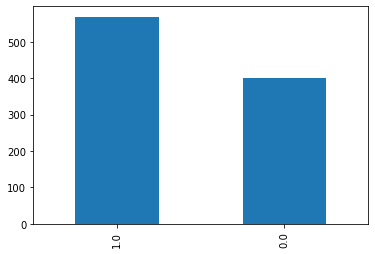

In [164]:
print(training['viable_candidate'].value_counts(normalize=True))
training['viable_candidate'].value_counts().plot.bar()

In [165]:
training.to_csv('.\\training.csv')

In [166]:
# Drop training examples from combined df to generate new test set
test_set = combined.drop(df[4].index)
test_set.to_csv('.\\test.csv')